# Tugas Metode Numerik Regresi
## Kurniawan Eka Nugraha       15/383239/PA/16899

Tugas saya buat code dalam python dan dituliskan dalam bentuk ipython notebook(.ipnyb). Input data dilakukan manual dengan cara dibuat dalam bentuk dataFrame maupun array. Untuk menampilkan grafik digunakan library seaborn.

### 1 Hubungan antara suhu ruangan dengan jumlah cacat yang terjadi
Buat plot grafik rata - rata suhu ruangan vs jumlah cacat, lalu lakukan regresi linier.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [2]:
df = pd.DataFrame({'tanggal': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                   'rataRataSuhu': [24,22,21,20,22,19,20,23,24,25,21,20,20,19,25,27,28,25,26,24,27,23,24,23,22,21,26,25,26,27],
                   'jumlahCacat': [10,5,6,3,6,4,5,9,11,13,7,4,6,3,12,13,16,12,14,12,16,9,13,11,7,5,12,11,13,14]})

#### Tabel Input

In [3]:
df = df[['tanggal','rataRataSuhu','jumlahCacat']]
display(df)

,tanggal,rataRataSuhu,jumlahCacat
0,1,24,10
1,2,22,5
2,3,21,6
3,4,20,3
4,5,22,6
5,6,19,4
6,7,20,5
7,8,23,9
8,9,24,11
9,10,25,13


#### Plot persebaran rataRataSuhu vs jumlahCacat

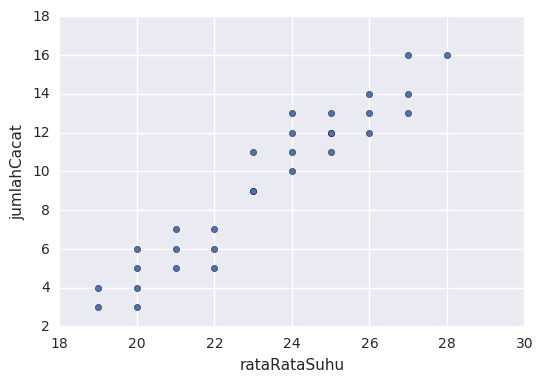

In [4]:
df.plot(kind="scatter", x="rataRataSuhu", y="jumlahCacat")

#### Fungsi Regresi Linier
Fungsi Regresi Linier y = a + bx didapat dengan mencari nilai koefisien a dan b menggunakan simple linear regression seperti dijelaskan dalam https://en.wikipedia.org/wiki/Simple_linear_regression. Fungsi python dari formula regresi didefinisikan seperti dibawah. Didapatkan nilai a= -23.375 dan b = 1.409. Sehingga fungsi linear regresi untuk permasalahan diatas adalah

y = -23.375 + 1.409x

dimana y adalah jumlah cacat dan x adalah suhu.

In [5]:
# Calculate Coefficients
data = [[24,10],[22,5],[21,6],[20,3],[22,6],[19,4],[20,5],[23,9],[24,11],[25,13],[21,7],[20,4],[20,6],[19,3],[25,12],
     [27,13],[28,16],[25,12],[27,13],[28,16],[25,12],[27,13],[28,16],[25,12],[26,14],[24,12],[27,16],[23,9],[24,13],
     [23,11]]

 
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	a = y_mean - b * x_mean
	return [a, b]
 
# calculate coefficients
a, b = coefficients(data)
print(np.poly1d([b,a]))

 
1.409 x - 23.38


#### Grafik dari fungsi regresi linier + plot data awal

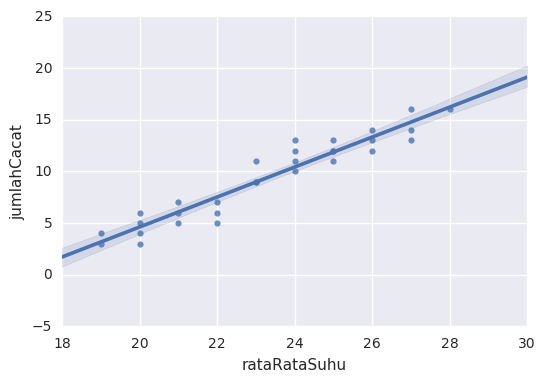

In [6]:
sns.regplot(x="rataRataSuhu", y="jumlahCacat", data=df)

### 2 Hubungan penambahan pupuk cair dengan jumlah umbi pada bawang merah
Buat plot grafik penambahan jumlah pupuk organik cair vs jumlah umbi, lalu lakukan regresi kuadrat.

#### Tabel input

In [7]:
u = pd.DataFrame({'poc': [0,2,4,6,8], 'umbi': [7.00,6.87,6.23,6.33,6.60]})
display(u)

,poc,umbi
0,0,7.00
1,2,6.87
2,4,6.23
3,6,6.33
4,8,6.60


#### Plot penggunaan poc vs umbi

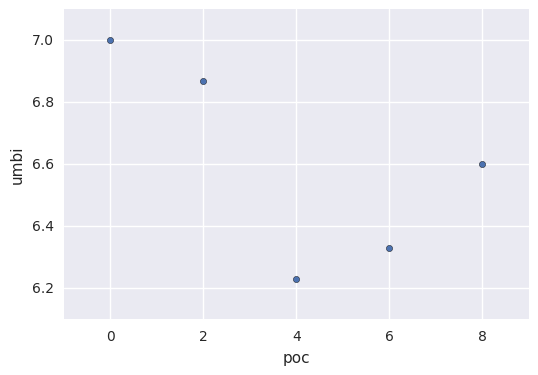

In [8]:
u.plot(kind="scatter", x="poc", y="umbi")

#### Fungsi Regresi Kuadrat

Untuk menentukan fungsi regresi kuadrat digunakan fungsi polyfit dari library numpy. Polyfit sendiri dasarnya adalah formula regresi dalam bentuk matrix.

In [9]:
x = [0,2,4,6,8]
y = [7.00,6.87,6.23,6.33,6.60]
p = np.poly1d(np.polyfit(x, y, deg=2), variable='x')
print (p)

        2
0.0275 x - 0.287 x + 7.094


#### Grafik fungsi regresi kuadratik + plot data awal

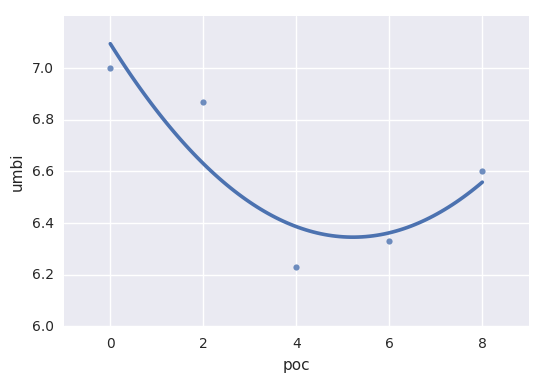

In [10]:
sns.regplot(x="poc", y="umbi", data=u, order=2, ci=None, truncate=True)